<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Предсказание-коэффициента-восстановления-золота-из-золотосодержащей-руды" data-toc-modified-id="Предсказание-коэффициента-восстановления-золота-из-золотосодержащей-руды-1">Предсказание коэффициента восстановления золота из золотосодержащей руды</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2">Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3">Анализ данных</a></span></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-4">Обучение модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5">Общий вывод</a></span></li></ul></div>

# Предсказание коэффициента восстановления золота из золотосодержащей руды

Необходимо подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Будем пользоваться данными с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

# Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter('ignore')
pd.set_option('display.max_rows', None)

In [2]:
try:
    data_train = pd.read_csv('C:/Users/datasets/gold_industry_train.csv')
    data_test = pd.read_csv('C:/Users/datasets/gold_industry_test.csv')
    data_full = pd.read_csv('C:/Users/datasets/gold_industry_full.csv')
except:
    data_train = pd.read_csv('/datasets/gold_industry_train.csv') 
    data_test = pd.read_csv('/datasets/gold_industry_test.csv')
    data_full = pd.read_csv('/datasets/gold_industry_full.csv')

*Изучим общую информацию data_train.*

In [3]:
data_train.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


*Изучим общую информацию data_test.*

In [5]:
data_test.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805


In [6]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

*Изучим общую информацию data_full.*

In [7]:
data_full.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [8]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


*Проверка эффективности обогащения.*

In [9]:
recovery = data_train['rougher.output.concentrate_au']*(
data_train['rougher.input.feed_au'] - data_train['rougher.output.tail_au']) / (
data_train['rougher.input.feed_au'] * (data_train['rougher.output.concentrate_au'] - 
                                       data_train['rougher.output.tail_au']))*100 

print('MAE:', mean_absolute_error(data_train['rougher.output.recovery'], recovery)) 

MAE: 9.83758577644259e-15


Абсолютная средняя ошибка очень мала, это говорит о том, что эффективность обогащения рассчитана правильно.

*Рассмотрим, какие признаки есть в обучающей выборке, но при этом отустствуют в тестовой.*

In [10]:
list_train = data_train.columns.values.tolist()
list_test = data_test.columns.values.tolist()
for quantity in list_train:
    if quantity not in list_test:
        print(quantity)

rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_au
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.recovery
rougher.output.tail_au
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.tail_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
secondary_cleaner.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.output.tail_sol
final.output.concentrate_au
final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.recovery
final.output.tail_au
final.output.ta

Проанализировав какие столбцы есть в train и отсутствуют в test, можно сделать вывод, что это столбцы содержащие выходные характеристики ступеней технологического процесса. Поскольку эти значения можно получить лишь после самого процесса, такие столбцы необходимо исключить из процесса обучения предсказывающих моделей.

*В тестовой выборке отсутствуют два целевых признака: rougher.output.recovery и final.output.recovery. Добавим их в датасет из исходной таблицы.*

In [11]:
data_test = data_test.merge(data_full[['date', 'rougher.output.recovery', 'final.output.recovery']], how = 'inner', on='date')
data_test.head(10)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575,89.514960,70.281454
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471,89.858126,65.523246
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155,91.816623,74.817644
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973,88.478959,63.082720
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805,89.230316,74.463380
5,2017-12-09 19:59:59,5.848338,6.234198,4.468803,37.816555,547.515088,85.875864,8.040386,7.500718,1201.408796,...,20.000113,-500.584093,18.003899,-500.326371,12.978611,-499.966502,19.988673,-500.742891,89.243530,73.391498
6,2017-12-09 20:59:59,6.172839,6.213598,4.458071,36.829223,518.363800,73.426294,7.641859,7.498470,1198.551240,...,20.010567,-500.545746,18.040164,-498.936442,12.988702,-499.985412,20.014155,-499.443855,90.945903,76.537426
7,2017-12-09 21:59:59,5.743825,6.264367,4.428267,37.170131,500.494798,75.915232,7.230213,7.496599,1201.172468,...,20.043525,-499.701442,17.991164,-500.324632,13.000809,-500.181711,20.001605,-500.229965,90.045570,66.699123
8,2017-12-09 22:59:59,5.558520,6.167472,4.370640,37.356892,540.990643,79.668503,7.089240,7.524634,1195.305111,...,19.995022,-500.415107,18.057379,-499.238503,13.011922,-500.067255,20.002796,-504.347015,86.561726,66.803293
9,2017-12-09 23:59:59,5.473143,6.076597,4.274908,38.631317,492.146649,90.792119,7.367698,6.543369,1203.076302,...,20.016755,-499.840744,17.991566,-500.303770,13.023215,-500.018271,20.015115,-515.537548,87.744255,68.563604


*Проверим обучающую и тестовую выборки на наличие дубликатов.*

In [12]:
print('Количество дубликатов в обучающей выборке:', data_train.duplicated().sum())

print('Количество дубликатов в тестовой выборке:', data_test.duplicated().sum())

Количество дубликатов в обучающей выборке: 0
Количество дубликатов в тестовой выборке: 0


*Проверим обучающую выборку на наличие пропусков.*

In [13]:
data_train.isna().sum()

date                                                    0
rougher.input.feed_au                                   0
rougher.input.feed_ag                                   0
rougher.input.feed_pb                                  72
rougher.input.feed_sol                                 77
rougher.input.feed_rate                                 7
rougher.input.feed_size                               101
rougher.input.floatbank10_sulfate                      31
rougher.input.floatbank10_xanthate                      7
rougher.state.floatbank10_a_air                         0
rougher.state.floatbank10_a_level                       0
rougher.state.floatbank10_b_air                         0
rougher.state.floatbank10_b_level                       0
rougher.state.floatbank10_c_air                         0
rougher.state.floatbank10_c_level                       0
rougher.state.floatbank10_d_air                         0
rougher.state.floatbank10_d_level                       0
rougher.state.

*Проверим тестовую выборку на наличие пропусков.*

In [14]:
data_test.isna().sum()

date                                            0
rougher.input.feed_au                           0
rougher.input.feed_ag                           0
rougher.input.feed_pb                          28
rougher.input.feed_sol                         22
rougher.input.feed_rate                         4
rougher.input.feed_size                        44
rougher.input.floatbank10_sulfate               3
rougher.input.floatbank10_xanthate              1
rougher.state.floatbank10_a_air                 1
rougher.state.floatbank10_a_level               1
rougher.state.floatbank10_b_air                 1
rougher.state.floatbank10_b_level               1
rougher.state.floatbank10_c_air                 1
rougher.state.floatbank10_c_level               1
rougher.state.floatbank10_d_air                 0
rougher.state.floatbank10_d_level               0
rougher.state.floatbank10_e_air                 7
rougher.state.floatbank10_e_level               0
rougher.state.floatbank10_f_air                 0


*Из-за того, что данные индексируются датой и временем получения информации, соседние по времени параметры часто похожи. Заполним пропуски соседними значениями.*

In [15]:
data_train = data_train.fillna(method='ffill')
print('Количество пропусков в обучающей выборке:', data_train.isna().sum().sum())

data_test = data_test.fillna(method='ffill')
print('Количество пропусков в тестовой выборке:', data_test.isna().sum().sum())

Количество пропусков в обучающей выборке: 0
Количество пропусков в тестовой выборке: 0


**Вывод:**

- Изучили общую информацию датафреймов.
- Рассчитали эффективность обогащения(MAE: 9.83758577644259e-15).
- Рассмотрели признаки которые есть в обучающей выборке, но при этом отустствуют в тестовой.
- Добавили в датасет из исходной таблицы два целевых признака: rougher.output.recovery и final.output.recovery.
- Проверили обучающую и тестовую выборки на наличие дубликатов.
- Обнаружили и избавились от пропусков в обучающей и тестовой выборках.

# Анализ данных

*Рассмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.*

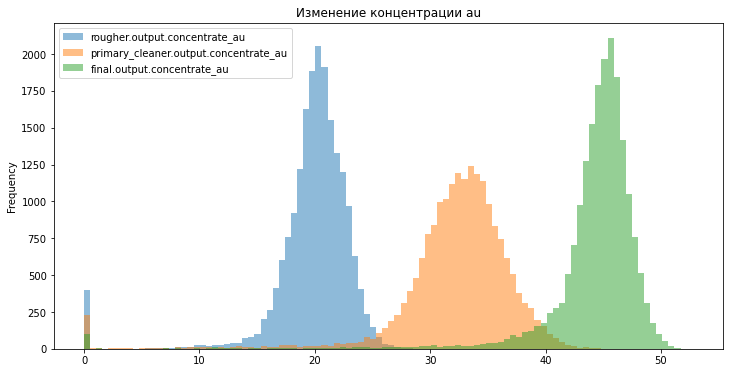

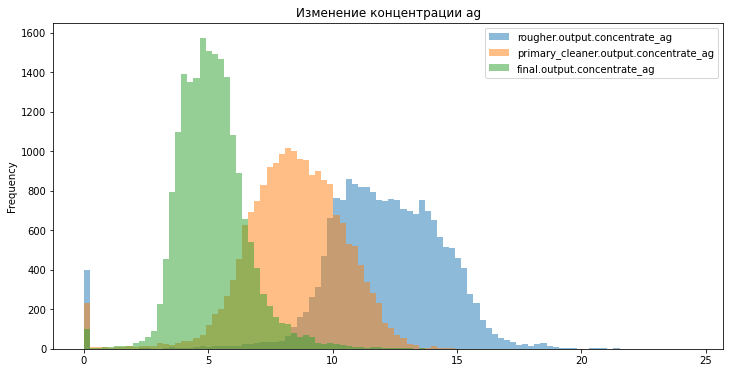

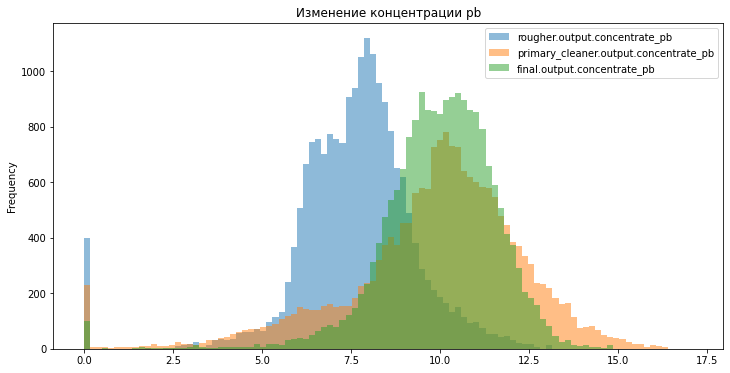

In [16]:
metals = ['au', 'ag', 'pb']
concentrate = ['rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate',]
for metal in metals:
    phase = ['{}_{}'.format(x, metal) for x in concentrate]
    data_full[phase].plot(kind='hist', bins=100, figsize=(12, 6), alpha=0.5)
    plt.title('Изменение концентрации {}'.format(metal))
    plt.show()

Концентрация золота увеличивается на каждом этапе очистки, а концентрация серебра наоборот падает, уже начиная с этапа rougher. Концентрация свинца увеличивается на протяжении всех этапов, но не так сильно как концентрация золота.

*Теперь сравним распределения размеров гранул сырья на обучающей и тестовой выборках.*

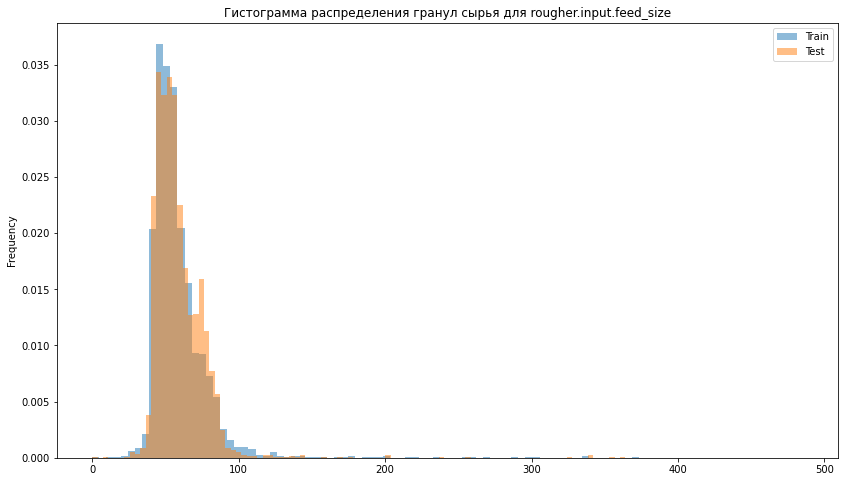

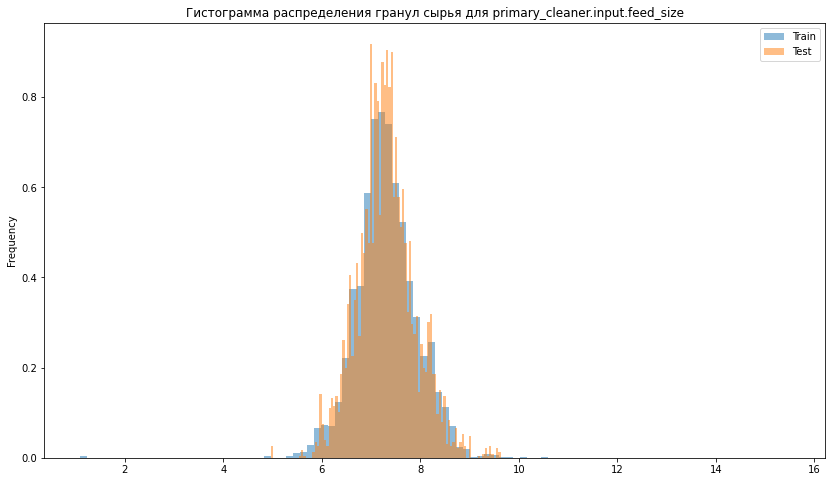

In [17]:
feed_size = ['rougher.input.feed_size', 'primary_cleaner.input.feed_size']
data = [(data_train, 'Train'), (data_test, 'Test')]
for size in feed_size:
    for df, lab in data: 
        df[size].plot(kind='hist', bins=100, figsize=(14, 8), density=True, alpha=0.5, label='{}'.format(lab), legend=True)
    plt.title('Гистограмма распределения гранул сырья для {}'.format(size)) 
    plt.show()

На гистограмме мы можем наблюдать, что распределение размеров гранул сырья в обучающей выборке аналогично распределению в тестовой, а следоватьельно оценка модели будет правильной.

*С целью выявления аномалий найдем суммарную концентрацию всех веществ (металлы плюс sol) на разных стадиях: в сырье, в черновом и финальном концентратах.*

In [18]:
substances = ['au', 'ag', 'pb', 'sol']
for phase in concentrate:
    data_train[phase] = 0
    for substance in substances:
        data_train[phase] += data_train['{}_{}'.format(phase, substance)]
    
data_train[concentrate].head()

,rougher.output.concentrate,primary_cleaner.output.concentrate,final.output.concentrate
0,66.424950,72.640924,63.644396
1,67.012710,72.543485,63.957723
2,66.103793,72.095042,64.311180
3,65.752751,59.957723,63.573449
4,65.908382,71.321010,64.004667


*Построим диаграмму размаха и гистограмму суммарной концентрации на разных стадиях.*

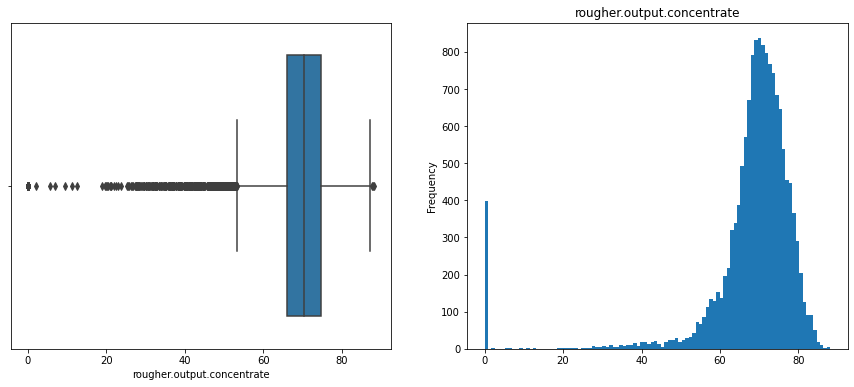

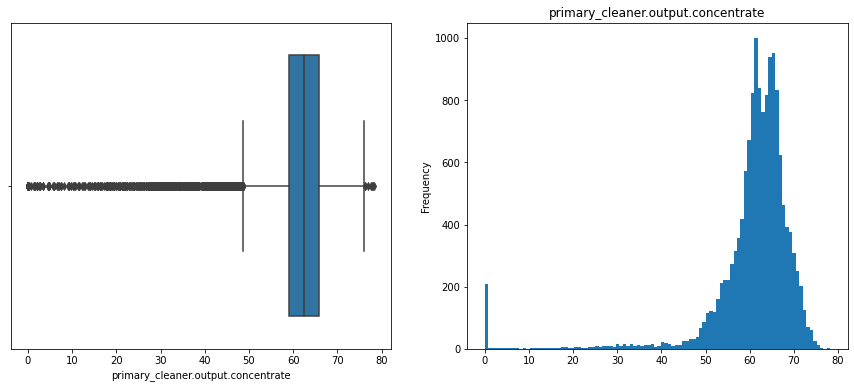

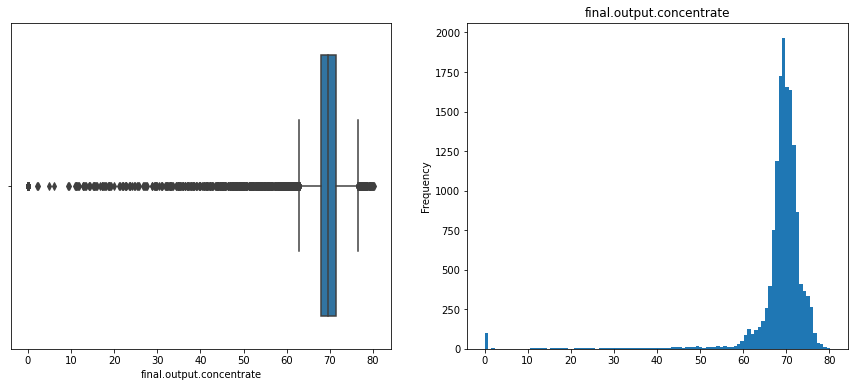

In [19]:
for phase in concentrate:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    sns.boxplot(x=data_train[phase], ax=axes[0])
    
    data_train[phase].plot(kind='hist', bins=100, ax=axes[1])
    plt.title('{}'.format(phase))
    plt.show()

*На графиках видно, что есть нулевые значения. Удалим их из обучающей выборки.*

In [20]:
data_train = data_train[(data_train['rougher.output.concentrate'] !=0) & (data_train['primary_cleaner.output.concentrate'] !=0)
                    & (data_train['final.output.concentrate'] !=0)]
data_train.shape

(13988, 90)

**Вывод:**

- Рассмотрели, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.
- Рассмотрели распределения размеров гранул сырья на обучающей и тестовой выборках.
- Построили диаграмму размаха и гистограмму суммарной концентрации на разных стадиях.
- Избавились от аномальных значений.

# Обучение модели

*Удалим из обучающей выборки лишние признаки (отуствуют в тестовой выборке).*

In [21]:
col_to_delete = set(data_train.columns.to_list()) - set(data_test.columns.to_list())
data_train = data_train.drop(col_to_delete, axis='columns')
data_train.shape

(13988, 55)

*Теперь напишем функцию для вычисления итоговой sMAPE.*

In [22]:
def cal_smape(y_true, y_pred):
    error = abs(y_true - y_pred)
    scale = (abs(y_true) + abs(y_pred)) / 2
    result = (error / scale).mean()
    return result*100
 

def final_smape(y_true, y_pred):
    y_true.reset_index(drop=True, inplace=True)
    y_pred = pd.DataFrame(data=y_pred)
    rougher = cal_smape(y_true.iloc[:, 0], y_pred.iloc[:, 0])
    final = cal_smape(y_true.iloc[:, 1], y_pred.iloc[:, 1])
    return 0.25 * rougher + 0.75 * final

*Выделим для тестовой и обучающей выборок признаки и целевые признаки.*

In [23]:
target = ['rougher.output.recovery', 'final.output.recovery']
target_train = data_train[target]
features_train = data_train.drop(target, axis=1, inplace=True)
features_train = data_train.drop('date', axis=1)

target_test = data_test[target]
features_test = data_test.drop(target, axis=1, inplace=True)
features_test = data_test.drop('date', axis=1)

print(target_train.columns)
print(features_train.shape)
print(target_test.columns)
print(features_test.shape)

Index(['rougher.output.recovery', 'final.output.recovery'], dtype='object')
(13988, 52)
Index(['rougher.output.recovery', 'final.output.recovery'], dtype='object')
(4860, 52)


*Создадим переменную smape_scorer, чтобы в дальнейшем использовать ее при кросс-валидации, воспользовшись функцией make_scorer.*

In [24]:
smape_scorer = make_scorer(final_smape, greater_is_better=False)

*Обучим модель дерева решений.*

In [25]:
param_grid = {'max_depth': range(2, 15)}
model = DecisionTreeRegressor(random_state=12345)
search = GridSearchCV(model, param_grid, cv=5, scoring=smape_scorer)
search.fit(features_train, target_train)
print('sMAPE для дерева решений: {} при значениях гиперпараметров: {}'.format(-search.best_score_, search.best_params_))

sMAPE для дерева решений: 8.65432784124032 при значениях гиперпараметров: {'max_depth': 3}


*Обучим модель случайного леса.*

In [26]:
param_grid = {'n_estimators': range(1, 31, 10)}
model = RandomForestRegressor(max_depth=3, random_state=12345)
search = GridSearchCV(model, param_grid, cv=5, scoring=smape_scorer)
search.fit(features_train, target_train)
print('sMAPE для случайного леса: {} при значениях гиперпараметров: {}'.format(-search.best_score_, search.best_params_))

sMAPE для случайного леса: 8.53438227249777 при значениях гиперпараметров: {'n_estimators': 21}


*Обучим модель линейной регрессии.*

In [27]:
model = LinearRegression()
model.fit(features_train, target_train)
smape = cross_val_score(model, features_train, target_train, cv=5, scoring=smape_scorer).mean()
print('sMAPE для линейной регрессии:', -smape)

sMAPE для линейной регрессии: 8.86823915698605


Наилучшей оказалась модель случайного леса.

*Проверим лучшую модель случайного леса на тестовой выборке и сравним качество предсказаний с константной моделью. За константу возьмём средние значения.*

In [28]:
model = RandomForestRegressor(max_depth=3, n_estimators=21, random_state=12345) 
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)

print('sMAPE тестовой выборки:', final_smape(target_test, predictions_test))

sMAPE тестовой выборки: 7.437266623001308


In [29]:
median_rougher = pd.Series([target_train['rougher.output.recovery'].median()]*len(target_train))
median_final = pd.Series([target_train['final.output.recovery'].median()]*len(target_train))

model = RandomForestRegressor(max_depth=3, n_estimators=21, random_state=12345) 
model.fit(features_train, target_train)
predictions_test_constant = pd.concat([median_rougher, median_final], axis=1)

print('sMAPE константной модели:', final_smape(target_test, predictions_test_constant))

sMAPE константной модели: 8.294903819577549


**Вывод:**

- Удалили из обучающей выборки лишние признаки
- Написали функцию для вычисления итоговой sMAPE
- Выделим для тестовой и обучающей выборок признаки и целевые признаки.
- Создали переменную smape_scorer, чтобы в дальнейшем использовать ее при кросс-валидации, воспользовшись функцией make_scorer
- Обучили модели дерева решений(sMAPE - 8.65432784124032), случайного леса(sMAPE - 8.53438227249777), линейной регресси(sMAPE - 8.86823915698605)
- Проверили лучшую модель случайного леса на тестовой выборке(sMAPE - 7.437266623001308) и сравним качество предсказаний с константной моделью(sMAPE - 8.294903819577549).

# Общий вывод

**Подготовка данных**
- Изучили общую информацию датафреймов.
- Рассчитали эффективность обогащения(MAE: 9.83758577644259e-15).
- Рассмотрели признаки которые есть в обучающей выборке, но при этом отустствуют в тестовой.
- Добавили в датасет из исходной таблицы два целевых признака: rougher.output.recovery и final.output.recovery.
- Проверили обучающую и тестовую выборки на наличие дубликатов.
- Обнаружили и избавились от пропусков в обучающей и тестовой выборках.

**Анализ данных**
- Рассмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.
- Рассмотрели распределения размеров гранул сырья на обучающей и тестовой выборках.
- Построили диаграмму размаха и гистограмму суммарной концентрации на разных стадиях.
- Избавились от аномальных значений.

**Обучение Модели**
- Удалили из обучающей выборки лишние признаки
- Написали функцию для вычисления итоговой sMAPE
- Выделим для тестовой и обучающей выборок признаки и целевые признаки.
- Создали переменную smape_scorer, чтобы в дальнейшем использовать ее при кросс-валидации, воспользовшись функцией make_scorer
- Обучили модели дерева решений(sMAPE - 8.65432784124032), случайного леса(sMAPE - 8.53438227249777), линейной регресси(sMAPE - 8.86823915698605)
- Проверили лучшую модель случайного леса на тестовой выборке(sMAPE - 7.437266623001308) и сравним качество предсказаний с константной моделью(sMAPE - 8.294903819577549).
- Наилучшие гипермараметры для модели случайного леса: max_depth=3, n_estimators=21